In [34]:
import sympy as sy
import numpy as np

In [35]:
#gravity
g = 9.81

#drone parameters
m = 0.851093668 #kg
l = 0.25 #m
kt = 0.0023918   #N/(rad/s)
#moments of inertia in 
Ixx = 0.00716 #kg*m^2
Iyy = 0.00716 #kg*m^2
Izz = 0.02521 #kg*m^2
Ir = 7.92337e-5 #kg*m^2

#efficiency
e = 34.0136 #W/N

#battery energy
E = 32.56*3600  #Watt hours to Joules

In [36]:
R = 2 #m
v = 0.5 #m/s

angle = np.arctan(v**2/(g*R))

In [37]:
w0 = (np.sqrt(m*g/(4*kt*np.cos(angle))))


omega = v/R

In [38]:

#time step
dt = 0.01

#initital conditions
w1 = w0
w2 = w0
w3 = w0
w4 = w0 

time = 0

x = 0
y = 0
z = 1

dx = v * np.cos(angle) #because d/dt(x)
dy = v * np.sin(angle) # because d/dt(y)
dz = 0

theta = 0 #radian
phi = angle #radian
psi = 0 #radian

dtheta = 0 #radian/s
dphi = 0 #radian/s
dpsi = omega #radian/s

In [39]:
t0 = 0
t1 = 60

times = np.arange(t0,t1+dt,dt)

timecount = [time]
xcount = []
ycount = [] 
zcount = []
phicount = []
thetacount = []
psicount = []
energycount = []

#setting list for path intended
intendedx = []
intendedy = []


for t in times:

    #translational EOM
    T = kt*(w1**2+w2**2+w3**2+w4**2) #thrust magnitude

    ddx = -T/m*(np.cos(phi)*np.sin(theta)*np.cos(psi)+np.sin(psi)*np.sin(phi))
    ddy = -T/m*(np.cos(phi)*np.sin(theta)*np.sin(psi)-np.sin(phi)*np.cos(psi))
    ddz = -T/m*np.cos(phi)*np.cos(theta)+g

    #Rotational EOM
    
    p = dphi
    q = dtheta
    r = dpsi

    ddphi = (Iyy*q*r-Izz*q*r-kt*l*(w2**2-w4**2))/Ixx
    ddtheta = (Ixx*p*r+Izz*p*r+kt*l*(w1**2-w3**2))/Iyy
    ddpsi = (Ixx*p*q-Izz*p*q+kt*(w1**2-w2**2+w3**2-w4**2))/Izz

    #change translational values based on EOM
    dx += ddx*dt
    x += dx*dt + 0.5*ddx*dt**2

    dy+= ddy*dt
    y += dy*dt + 0.5*ddy*dt**2
    
    dz += ddz*dt
    z += dz*dt + 0.5*ddz*dt**2

    #change rotational values based on EOM
    dphi += ddphi*dt
    phi += dphi*dt + 0.5*ddphi*dt**2
    
    dtheta += ddtheta*dt
    theta += dtheta*dt + 0.5*ddtheta*dt**2

    dpsi += ddpsi*dt
    psi += dpsi*dt + 0.5*ddpsi*dt**2

    #energy usage calcation
    E -= e*T*dt
    
    zcount.append(z)
    ycount.append(y)
    xcount.append(x)
    phicount.append(phi)
    thetacount.append(theta)
    psicount.append(psi)
    energycount.append(E/3600) #convert back to watt hours

    intendedx.append(R*np.cos(omega*t))
    intendedy.append(R + R*np.sin(omega*t))

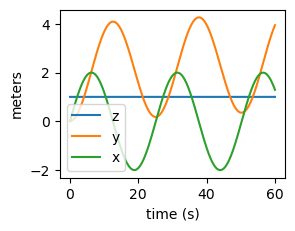

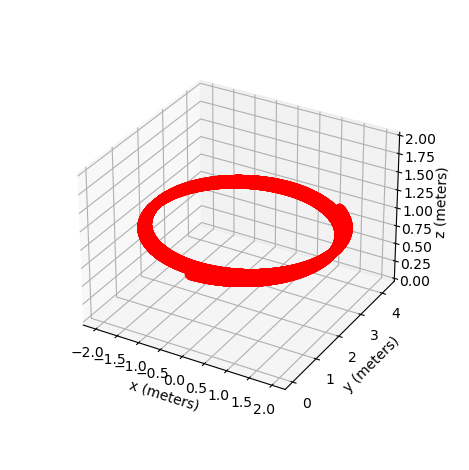

In [40]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(times, zcount, label='z')
ax1.plot(times, ycount, label='y')
ax1.plot(times, xcount, label='x')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(xcount, ycount, zcount, 'red', marker = 'o')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_box_aspect(None, zoom=0.8)
ax.set_zlim(0,2)
fig.tight_layout()
plt.show()

C:\Users\Vince\AppData\Local\Temp\ipykernel_9864\870456132.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4 = plt.subplot2grid((2,2), (1,1))


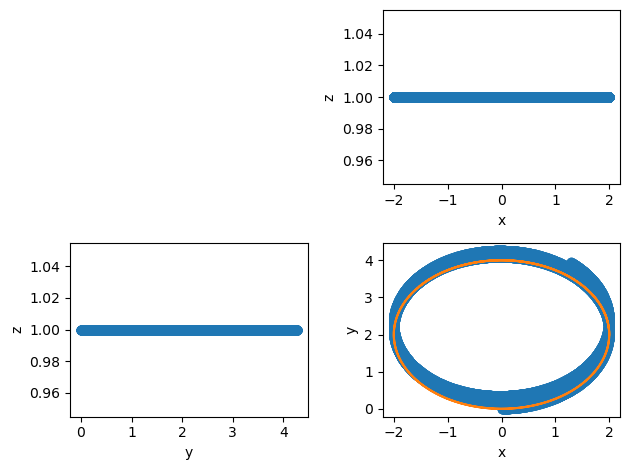

In [41]:
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(xcount, zcount, marker = 'o')
ax2.set_xlabel('x')
ax2.set_ylabel('z')


ax3 = plt.subplot2grid((2,2), (1,0))
ax3.plot(ycount, zcount, marker = 'o')
ax3.set_xlabel('y')
ax3.set_ylabel('z')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(xcount, ycount, marker = 'o')
ax4.plot(intendedx, intendedy)
ax4.set_xlabel('x')
ax4.set_ylabel('y')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(xcount, ycount, marker = 'o')
ax4.plot(intendedx, intendedy)
ax4.set_xlabel('x')
ax4.set_ylabel('y')

plt.tight_layout()

(0.0, 33.55921108226431)

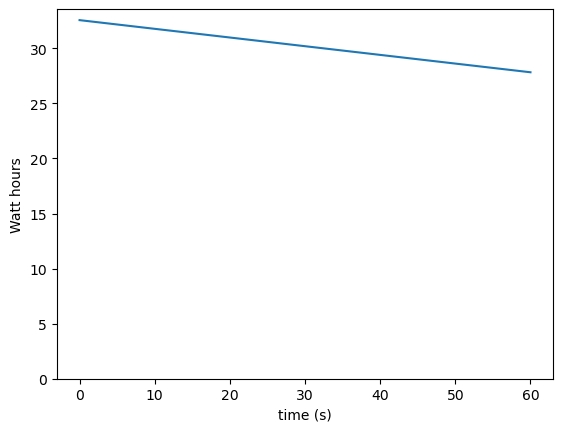

In [42]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((1,1), (0,0)) 
ax1.plot(times, energycount)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Watt hours')
ax1.set_ylim(0, energycount[0] + 1)